In [2]:
# !pip install python-mecab-ko pyLDAvis

## cholesterolreview_negative

In [1]:
import numpy as np

In [138]:
# cholesterolreview_negative.csv
import pandas as pd
# df_review_negative = pd.read_csv('../datasets/cholesterolreview_negative.csv')
df_review_negative = pd.read_csv('../../../project_nutrients_data_analytics/gatheringdatas/datasets/chol_preprocess_negative.csv')

In [139]:
df_review_negative.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66 entries, 0 to 65
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           66 non-null     int64  
 1   _id                  66 non-null     object 
 2   product_name         66 non-null     object 
 3   review_writer        66 non-null     object 
 4   review_date          66 non-null     object 
 5   review_star          66 non-null     float64
 6   review_content       66 non-null     object 
 7   reveiw_replaced      66 non-null     object 
 8   stopremoved_reviews  66 non-null     object 
 9   okt_reviews          66 non-null     object 
 10  mecab_reviews        66 non-null     object 
 11  replaced_review      66 non-null     object 
dtypes: float64(1), int64(1), object(10)
memory usage: 6.3+ KB


In [140]:
df_review_negative = df_review_negative.dropna()

### LDA 분석

##### 문장 벡터화

In [141]:
from gensim.corpora import Dictionary

In [142]:
# df_review_negative dictionary
dictionary = Dictionary(df_review_negative[['replaced_review']].values)
dictionary

In [143]:
dictionary.doc2bow(df_review_negative[['replaced_review']].values[3])

[(3, 1)]

In [144]:
# dictionary에 의한 한글 문장을 벡터화 변환
corpus_list = list()
for sentence in df_review_negative[['replaced_review']].values :
  vectors = dictionary.doc2bow(sentence)
  corpus_list.append(vectors)

In [145]:
df_review_negative['문장벡터화'] = corpus_list

In [146]:
df_review_negative.columns

Index(['Unnamed: 0', '_id', 'product_name', 'review_writer', 'review_date',
       'review_star', 'review_content', 'reveiw_replaced',
       'stopremoved_reviews', 'okt_reviews', 'mecab_reviews',
       'replaced_review', '문장벡터화'],
      dtype='object')

##### 토픽 잡기
- review_negative.csv 토픽 분석
- 토픽 수 9

In [147]:
from gensim.models import LdaModel

In [213]:
lda_model = LdaModel(corpus=corpus_list, id2word=dictionary, num_topics=7)

In [214]:
lda_model.print_topics(num_words=4)

[(0, '0.045*"제품" + 0.045*"저렴" + 0.024*"유독" + 0.024*"보라"'),
 (1, '0.026*"일류" + 0.026*"거기" + 0.026*"달맞이꽃" + 0.026*"별로"'),
 (2, '0.047*"나" + 0.025*"일류" + 0.025*"효과" + 0.025*"구입"'),
 (3, '0.045*"용량" + 0.024*"개월" + 0.024*"유통" + 0.024*"효능"'),
 (4, '0.043*"브리" + 0.023*"나" + 0.023*"전혀" + 0.023*"캐나다"'),
 (5, '0.069*"어떻" + 0.069*"성능" + 0.036*"다행" + 0.036*"자유"'),
 (6, '0.043*"전혀" + 0.023*"다행" + 0.023*"증상" + 0.023*"리놀렌산"')]

##### 최적에 토픽 단어 수

In [215]:
sentences = df_review_negative['replaced_review']
sentences

0     배송 보통 성능 별로 유통 기한 감마 리놀렌산 효능 어떻 제약 회사 제품 여성 갱년...
1                                  배송 성능 별로 유통 기한 효과 전혀
2                    가격 배송 보통 브리 캐나다 감마 리놀렌산 보라 달맞이꽃 자유
3                                         부작용 안 나 다행 가요
4                                                    성능
                            ...                        
61                                                설사 줄줄
62                        기존 국내 제품 공구 판매 같 성분 복용 트러블 인걸
63                                 주문 해외 구매 대행 제품 반품 연락
64                                          복용 그다지 크 변화
65                                                   가격
Name: replaced_review, Length: 66, dtype: object

In [216]:
type(sentences)

pandas.core.series.Series

In [217]:
# 각 문장을 공백으로 나누어 리스트에 저장
tokenized_sentences = [sentence.split() for sentence in sentences]

In [218]:
# 결과 출력
morphs_list = list()
for tokens in tokenized_sentences:
    morphs_list.append(tokens)
morphs_list

[['배송',
  '보통',
  '성능',
  '별로',
  '유통',
  '기한',
  '감마',
  '리놀렌산',
  '효능',
  '어떻',
  '제약',
  '회사',
  '제품',
  '여성',
  '갱년기',
  '효과',
  '유독',
  '상품',
  '가격',
  '회사',
  '비교',
  '함유',
  '개월',
  '거기',
  '캡슐',
  '판매',
  '구입'],
 ['배송', '성능', '별로', '유통', '기한', '효과', '전혀'],
 ['가격', '배송', '보통', '브리', '캐나다', '감마', '리놀렌산', '보라', '달맞이꽃', '자유'],
 ['부작용', '안', '나', '다행', '가요'],
 ['성능'],
 ['배송',
  '성능',
  '별로',
  '유통',
  '기한',
  '보통',
  '보라',
  '달맞이꽃',
  '갱년기',
  '증상',
  '효능',
  '회사',
  '비교',
  '감마',
  '리놀렌산',
  '함유',
  '가격',
  '개월',
  '제품',
  '거기',
  '판매',
  '구입',
  '일류',
  '낱개',
  '포장',
  '보관',
  '온도',
  '저렴',
  '용량',
  '냉장고'],
 ['가격', '배송'],
 ['배송', '보통', '성능', '별로', '유통', '기한'],
 ['가격', '안', '배송', '타'],
 ['배송', '성능', '별로', '유통', '기한', '와이프'],
 ['가격', '배송', '보통'],
 ['인지질', '좋', '아시', '닥터', '크릴', '표현', '레시틴', '함량', '북극해', '생태', '살리', '오일'],
 ['쭈욱', '먹', '제품', '할인', '주문'],
 ['배송',
  '성능',
  '별로',
  '유통',
  '기한',
  '박스',
  '혈압',
  '측정',
  '복용',
  '개월',
  '현재',
  '별다르',
  '개선'],
 ['배송', '성능', '유통', '기한'

In [219]:
preprocessed_sentences = morphs_list

In [220]:
dictionary = Dictionary(preprocessed_sentences) # fix in like sklean
dictionary

In [221]:
# 일관성 점수
from gensim.models.coherencemodel import CoherenceModel
coherenceModel = CoherenceModel(model=lda_model, texts=morphs_list, dictionary=dictionary)
coherenceModel.get_coherence()

0.4503005000087752

In [222]:
# 혼잡도 점수
lda_model.log_perplexity(corpus_list)

-7.160918825644675

In [223]:
start_topic = 2
end_topic = 10
coherence_scores = list()
perplexity_scores = list()
for topic_number in range(start_topic, end_topic+1):
    lda_model_loop = LdaModel(corpus=corpus_list, id2word=dictionary, num_topics=topic_number) # fix
    coherenceModel = CoherenceModel(model=lda_model_loop, texts=morphs_list, dictionary=dictionary)
    coherence_scores.append(coherenceModel.get_coherence()) # 일관성 점수
    perplexity_scores.append(lda_model_loop.log_perplexity(corpus_list))

In [224]:
import pandas as pd
scores = pd.DataFrame([coherence_scores,  perplexity_scores]).T
scores

,0,1
0,0.415325,-6.201681
1,0.475114,-6.452717
2,0.438553,-6.632352
3,0.458678,-6.845568
4,0.457318,-7.033789
5,0.460032,-7.156728
6,0.459388,-7.381970
7,0.449662,-7.481594
8,0.445869,-7.439929


In [225]:
import seaborn as sns
import matplotlib.pyplot as plt

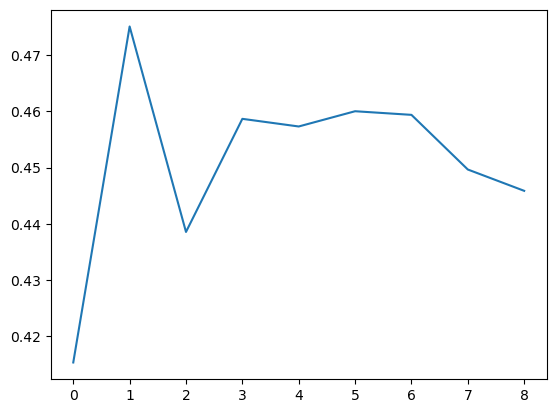

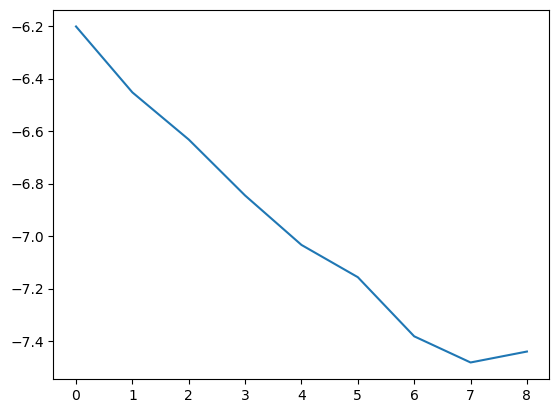

In [226]:
sns.lineplot(coherence_scores)
plt.show()
sns.lineplot(perplexity_scores)
plt.show()

##### LDA 시각화(review_negative)

In [227]:
# %pip install pyLDAvis

In [228]:
import pyLDAvis.gensim_models

In [229]:
pyLDAvis.enable_notebook() # 일반적인 python에선 불필요
result_visualized = pyLDAvis.gensim_models.prepare(lda_model, corpus_list, dictionary)

In [230]:
pyLDAvis.display(result_visualized)

In [112]:
# review_negative_result_visualized.html
pyLDAvis.save_html(result_visualized, '../datasets/cholesterolreview_negative_result_visualized.html')

## cholesterolreview_positive

In [113]:
import pandas as pd
df_review_positive = pd.read_csv('../datasets/cholesterolreview_positive.csv')

In [114]:
df_review_positive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6205 entries, 0 to 6204
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        6205 non-null   int64  
 1   _id               6205 non-null   object 
 2   product_name      6205 non-null   object 
 3   review_writer     6205 non-null   object 
 4   review_date       6205 non-null   object 
 5   review_star       6205 non-null   float64
 6   review_content    6205 non-null   object 
 7   tokenizer_review  6205 non-null   object 
 8   replaced_review   6187 non-null   object 
dtypes: float64(1), int64(1), object(7)
memory usage: 436.4+ KB


In [115]:
df_review_positive = df_review_positive.dropna()

### LDA 분석

##### 문장 벡터화

In [116]:
# 'replaced_review' 열의 모든 값을 문자열로 변환
df_review_positive['replaced_review'] = df_review_positive['replaced_review'].astype(str)

In [117]:
dictionary = Dictionary(df_review_positive[['replaced_review']].values)
dictionary

In [118]:
# dictionary에 의한 한글 문장을 벡터화 변환
corpus_list = list()
for sentence in df_review_positive[['replaced_review']].values :
  vectors = dictionary.doc2bow(sentence)
  corpus_list.append(vectors)

In [119]:
df_review_positive['문장벡터화'] = corpus_list

In [120]:
df_review_positive[:3]

,Unnamed: 0,_id,product_name,review_writer,review_date,review_star,review_content,tokenizer_review,replaced_review,문장벡터화
0,0,650d8884b2af41f5ca5ba6aa,브리오 보라지오일 감마리놀렌산 300 / 오메가6 보라지유 달맞이꽃종자유 영양제 /...,지오됴됴,2021.03.19,5.0,배송 빨라요 성능 보통이에요 유통기한 기한이 넉넉해요\n감마리놀렌산이 여성에게 좋다...,"['배송', '빨르다', '성능', '유통', '기한', '기한', '넉넉하다', ...",배송 빨르다 성능 유통 기한 기한 넉넉하다 감마 리놀렌산 여성 좋다 다해 초록색 비...,"[(0, 1)]"
1,1,650d8884b2af41f5ca5ba6ab,브리오 보라지오일 감마리놀렌산 300 / 오메가6 보라지유 달맞이꽃종자유 영양제 /...,ju82**,2023.07.05,5.0,유통기한 기한이 넉넉해요 포장상태 포장이 깔끔해요 효과 효과 좋아요\n두번째 구입입...,"['유통', '기한', '기한', '넉넉하다', '포장', '상태', '포장', '...",유통 기한 기한 넉넉하다 포장 상태 포장 깔끔하다 좋다 두번째 구입 월경 증후군 구...,"[(1, 1)]"
2,2,650d8884b2af41f5ca5ba6ac,브리오 보라지오일 감마리놀렌산 300 / 오메가6 보라지유 달맞이꽃종자유 영양제 /...,sns2**,2023.09.20,5.0,유통기한 기한이 넉넉해요 포장상태 포장이 깔끔해요 효과 효과 좋아요\n유트브 보고 ...,"['유통', '기한', '기한', '넉넉하다', '포장', '상태', '포장', '...",유통 기한 기한 넉넉하다 포장 상태 포장 깔끔하다 좋다 유트브 구매 피부 염증 좋다...,"[(2, 1)]"


##### 토픽 잡기
- review_positive.csv 토픽 분석
- 토픽 수 9

In [121]:
lda_model = LdaModel(corpus=corpus_list, id2word=dictionary, num_topics=9)

In [122]:
lda_model.print_topics(num_words=4)

[(0,
  '0.036*"모르다 꾸준하다" + 0.036*"좋다 좋다" + 0.005*"가격 싸다 사다 배송 빨르다" + 0.004*"유통 기한 기한 넉넉하다 포장 상태 포장 깔끔하다 좋다"'),
 (1,
  '0.154*"배송 빨르다 성능 성능 뛰어나다 유통 기한 기한 넉넉하다" + 0.005*"가격 괜찮다 배송" + 0.003*"배송 빨르다 성능 성능 뛰어나다 유통 기한 기한 넉넉하다 세번 구매 지속 복용 상세" + 0.003*"유통 기한 기한 넉넉하다 포장 상태 포장 깔끔하다 좋다 기간 넉넉하다 포장 알다"'),
 (2,
  '0.013*"가격 싸다 사다 배송 빨르다" + 0.011*"배송 빨르다 성능 성능 뛰어나다 유통 기한 기한 넉넉하다 좋다" + 0.004*"배송 성능 성능 뛰어나다 유통 기한 기한 넉넉하다 혈관 건강 좋다 구입 좋다 결과 상세 상세" + 0.004*"배송 빨르다 성능 성능 뛰어나다 유통 기한 기한 넉넉하다 고혈압 가족 혈관 건강 걱정 돼다 혈관 좋다 오메가 알아보다 생선 만들다 동물성 오메가 늘다 중금속 위험 해조류 오메가 구매 임산부 소리 믿다 구매 오메가 늘다 혈관 중성 지방 녹이다 혈관 청소 해주다 혈액 순환 도와주다 불규칙하다 습관 중성 지방 걱정 필요하다 양제 덥다 코엔자임 큐텐 흥국 코엔자임 큐텐 별명 심장 비타민 심장 펌핌 도와주다 혈액 순환 좋다 도와주다 대요 흥국 좋다 콜레스트롤 높이다 나쁘다 콜레스테롤 낮추다 혈관 더욱 관리 좋다 양제 먹기 가격 부담 갯수 많아지다 먹기 쉬다 써다 시안 모든 좋다 다가 면역 좋다 혈관 점막 좋다 올인원 혈관 관리제 끄다 닫다 상세 상세 상세"'),
 (3,
  '0.076*"유통 기한 기한 넉넉하다 포장 상태 포장 깔끔하다 좋다" + 0.010*"배송 성능 성능 뛰어나다 유통 기한 기한 넉넉하다" + 0.009*"배송 빨르다 성능 성능 뛰어나다 유통 기한" + 0.009*"가격 괜찮다 배송"'),
 (4,
  '0.086*"좋다" + 0.033*"불편하다" + 0.003*"유통 

##### 최적에 토픽 단어 수

In [123]:
sentences = df_review_positive['replaced_review']
sentences

0       배송 빨르다 성능 유통 기한 기한 넉넉하다 감마 리놀렌산 여성 좋다 다해 초록색 비...
1       유통 기한 기한 넉넉하다 포장 상태 포장 깔끔하다 좋다 두번째 구입 월경 증후군 구...
2       유통 기한 기한 넉넉하다 포장 상태 포장 깔끔하다 좋다 유트브 구매 피부 염증 좋다...
3       유통 기한 기한 넉넉하다 포장 상태 포장 깔끔하다 크다 모르다 상세 판매 답글 판매...
4       배송 빨르다 성능 성능 뛰어나다 유통 기한 기한 넉넉하다 케이스 보내다 달라 확인 ...
                              ...                        
6200                                                 만족하다
6201                                    사이트 빠르다 배송 돼다 추하다
6202                                    고양이 유미 고양이 먹이다 사다
6203                                            배송 빠르다 좋다
6204                                                상품 배송
Name: replaced_review, Length: 6187, dtype: object

In [124]:
type(sentences)

pandas.core.series.Series

In [125]:
# 각 문장을 공백으로 나누어 리스트에 저장
tokenized_sentences = [sentence.split() for sentence in sentences]

In [126]:
# 결과 출력
morphs_list = list()
for tokens in tokenized_sentences:
    morphs_list.append(tokens)
morphs_list

[['배송',
  '빨르다',
  '성능',
  '유통',
  '기한',
  '기한',
  '넉넉하다',
  '감마',
  '리놀렌산',
  '여성',
  '좋다',
  '다해',
  '초록색',
  '비교',
  '해보다',
  '브리',
  '결정',
  '함량',
  '높다',
  '과정',
  '마음',
  '믿다',
  '구매',
  '좋다',
  '알약',
  '개봉시',
  '터지다',
  '주의',
  '껍질',
  '제거',
  '습관',
  '누르다',
  '터지다',
  '얼른',
  '양제',
  '실선',
  '좋다',
  '가위',
  '상세',
  '상세'],
 ['유통',
  '기한',
  '기한',
  '넉넉하다',
  '포장',
  '상태',
  '포장',
  '깔끔하다',
  '좋다',
  '두번째',
  '구입',
  '월경',
  '증후군',
  '구입',
  '모르다',
  '영향',
  '다시',
  '주문',
  '알약',
  '크기',
  '크다',
  '편입',
  '상세',
  '상세',
  '상세',
  '판매',
  '답글',
  '판매',
  '안녕하다',
  '고객',
  '브리',
  '제품',
  '구매',
  '해주다',
  '대단하다',
  '감사하다',
  '브리',
  '제품',
  '고객',
  '건강',
  '많다',
  '도움',
  '좋다',
  '문의사항',
  '연락',
  '줄다',
  '감사하다',
  '브리',
  '올리다'],
 ['유통',
  '기한',
  '기한',
  '넉넉하다',
  '포장',
  '상태',
  '포장',
  '깔끔하다',
  '좋다',
  '유트브',
  '구매',
  '피부',
  '염증',
  '좋다',
  '판매',
  '답글',
  '판매',
  '안녕하다',
  '고객',
  '브리',
  '제품',
  '구매',
  '해주다',
  '대단하다',
  '감사하다',
  '브리',
  '제품',
  '고객',
  '건강',
  '많다',
  '도

In [127]:
preprocessed_sentences = morphs_list

In [128]:
dictionary = Dictionary(preprocessed_sentences) # fix in like sklean
dictionary

In [129]:
# 일관성 점수
from gensim.models.coherencemodel import CoherenceModel
coherenceModel = CoherenceModel(model=lda_model, texts=morphs_list, dictionary=dictionary)
coherenceModel.get_coherence()

0.6436621877731914

In [130]:
# 혼잡도 점수
lda_model.log_perplexity(corpus_list)

-17.077893952368896

In [131]:
start_topic = 2
end_topic = 10
coherence_scores = list()
perplexity_scores = list()
for topic_number in range(start_topic, end_topic+1):
    lda_model = LdaModel(corpus=corpus_list, id2word=dictionary, num_topics=topic_number) # fix
    coherenceModel = CoherenceModel(model=lda_model, texts=morphs_list, dictionary=dictionary)
    coherence_scores.append(coherenceModel.get_coherence()) # 일관성 점수
    perplexity_scores.append(lda_model.log_perplexity(corpus_list))

In [132]:
import pandas as pd
scores = pd.DataFrame([coherence_scores,  perplexity_scores]).T
scores

,0,1
0,0.555731,-9.660903
1,0.640268,-10.013641
2,0.627389,-10.226827
3,0.625831,-10.399025
4,0.607182,-10.601152
5,0.658084,-13.953032
6,0.631378,-16.485618
7,0.652822,-17.712850
8,0.640082,-18.866871


In [133]:
import seaborn as sns
import matplotlib.pyplot as plt

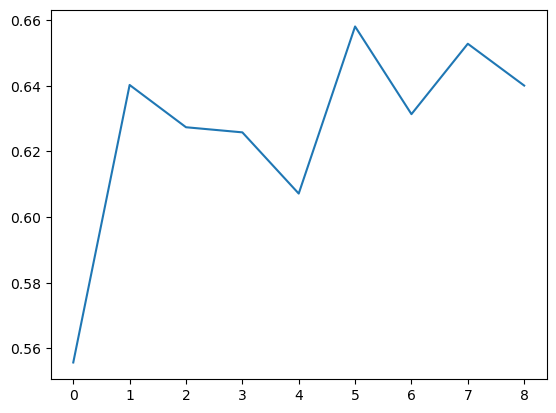

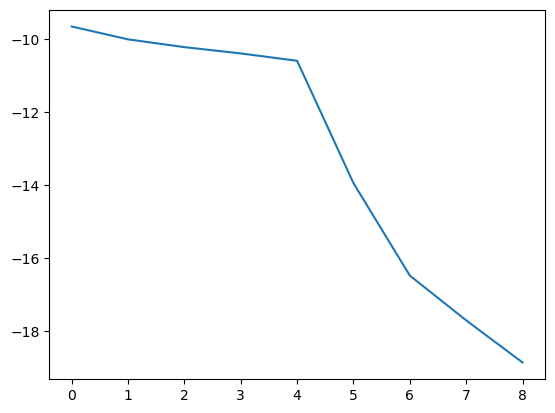

In [134]:
sns.lineplot(coherence_scores)
plt.show()
sns.lineplot(perplexity_scores)
plt.show()

##### LDA 시각화

In [135]:
pyLDAvis.enable_notebook() # 일반적인 python에선 불필요
result_visualized = pyLDAvis.gensim_models.prepare(lda_model, corpus_list, dictionary)

In [136]:
pyLDAvis.display(result_visualized)

In [137]:
pyLDAvis.save_html(result_visualized, '../datasets/cholesterolreview_positive_result_visualized.html')